In [76]:
# Importanto a base da bolsa considerando o período de 01/01/2023 até 16/01/2024

import yfinance as yf

symbol = '^BVSP'
start_date = '2018-01-01'
end_date = '2024-01-20'

In [77]:
# Pegando os dados importados e colocando em um DF

df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [78]:
# Criando csv com os dados importados

csv_filename = 'dadosBolsa.csv'
df.to_csv(csv_filename)

# Agora só olhar ali nos arquivos que verá o csv

In [79]:
# Importanto a lib do pandas

import pandas as pd

In [80]:
# Conhecendo mais sobre a nossa base e tratando

df = pd.read_csv("dadosBolsa.csv", sep=",")

In [81]:
# Com a função info() conseguimos ver detalhes, tipos sobre a nossa base

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1500 non-null   object 
 1   Open       1500 non-null   float64
 2   High       1500 non-null   float64
 3   Low        1500 non-null   float64
 4   Close      1500 non-null   float64
 5   Adj Close  1500 non-null   float64
 6   Volume     1500 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.2+ KB


In [82]:
# Com o shape conseguimos ver a quantidade de linhas e colunas

df.shape

(1500, 7)

In [83]:
# Com a função head() pegamos as cinco primeiras linhas da base, caso queria uma quantidade específica só colocar nos parenteses, por ex: df.head(3) viriam somente três linhas

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800


In [84]:
# Verificando se há dados nulos na base, mesmo com a info() já mostrando, é bom certificar

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [85]:
# Verificando se há  dados duplicados na base

df.duplicated().sum()

0

In [86]:
# Com a função describe() conseguimos ver infos da nossa base como a média (mean), desvio padrão (std)

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,103876.506000,104855.881333,102913.505333,103908.586667,103908.586667,8.769230e+06
std,14491.243298,14416.128324,14540.771986,14485.858537,14485.858537,4.284436e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,95499.750000,96435.000000,94415.500000,95514.250000,95514.250000,4.875925e+06
50%,105651.500000,106718.500000,104643.000000,105652.000000,105652.000000,8.988150e+06
75%,115058.250000,115812.000000,113946.000000,115057.000000,115057.000000,1.170840e+07
max,134194.000000,134392.000000,133832.000000,134194.000000,134194.000000,2.602930e+07


In [87]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800


In [88]:
# Iniciando algumas análises - Para as análises podemos usar algumas libs

import seaborn as sns
import matplotlib.pyplot as plt

df_limpo = df                                                              # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])                        # transformando em datetime
df_limpo = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close']) # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')                                      # definindo data como índice


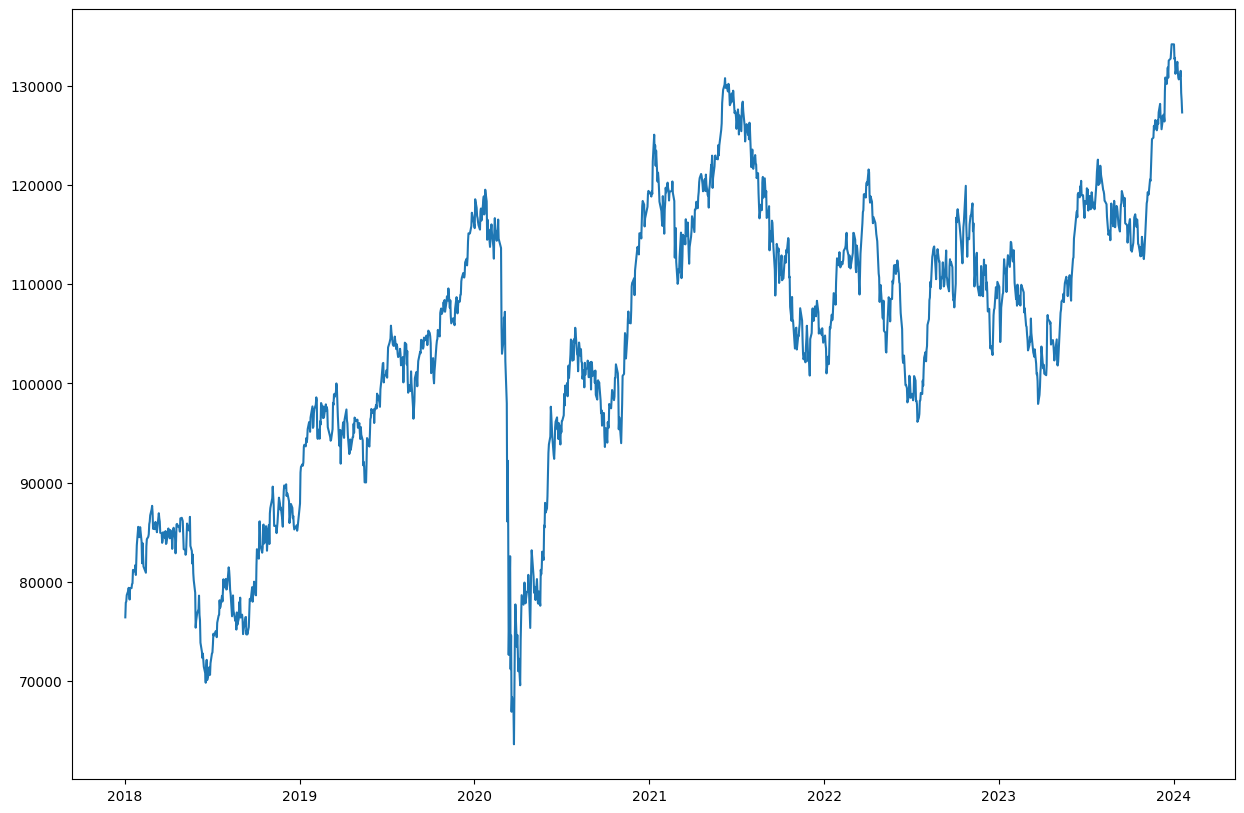

In [89]:
# Relação Date x Open (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Open'], label='BVSP')

#plt.legend(loc='best')
plt.show()

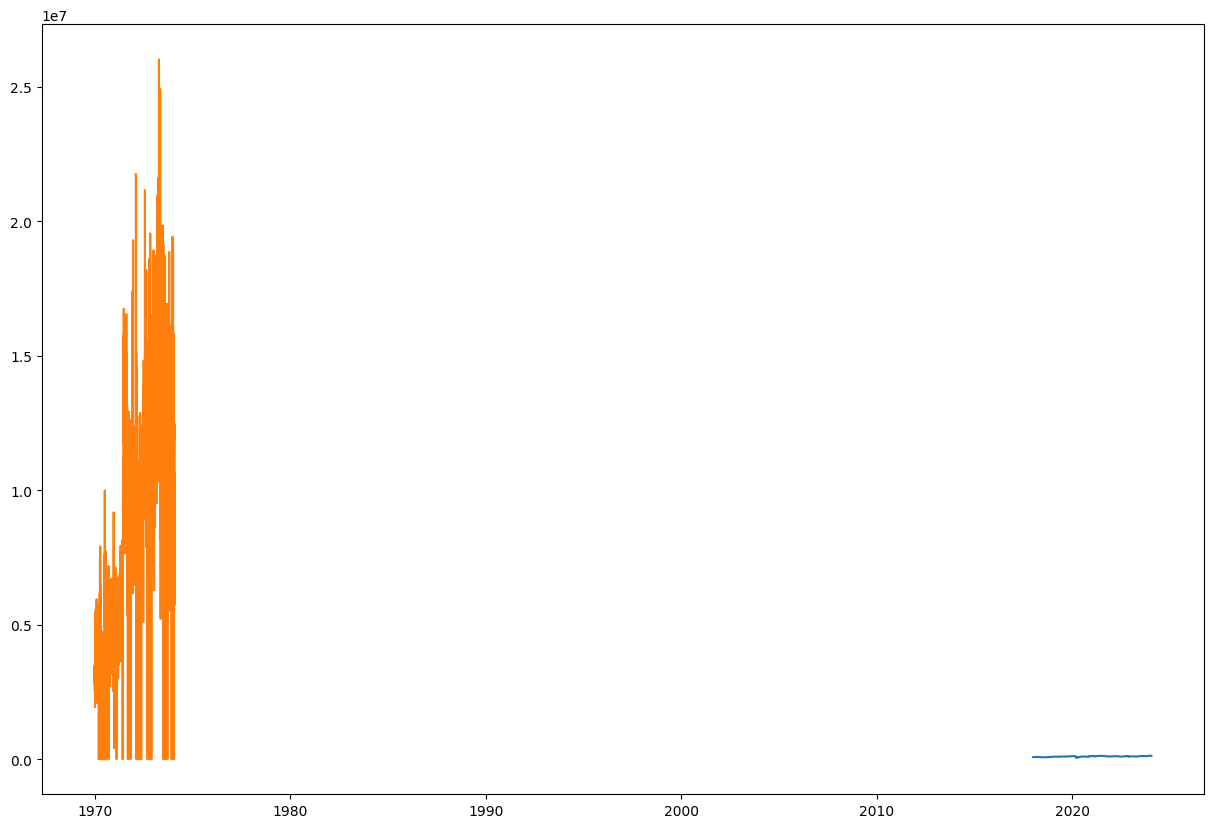

In [90]:
# Relação Date x Close x Volume (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'],df['Close'],df['Volume'], label='BVSP')

#plt.legend(loc='best')
plt.show()

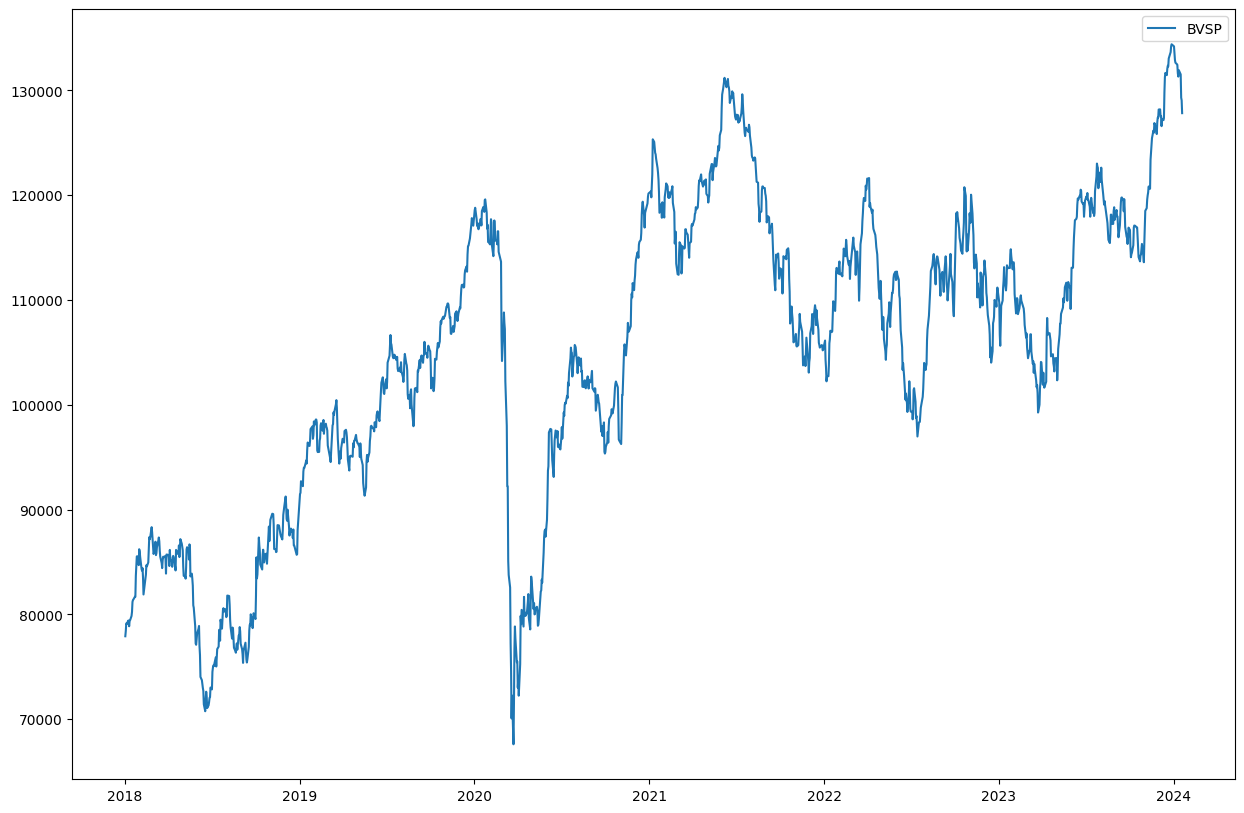

In [92]:
# Relação Date x High (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['High'], label='BVSP')

plt.legend(loc='best')
plt.show()

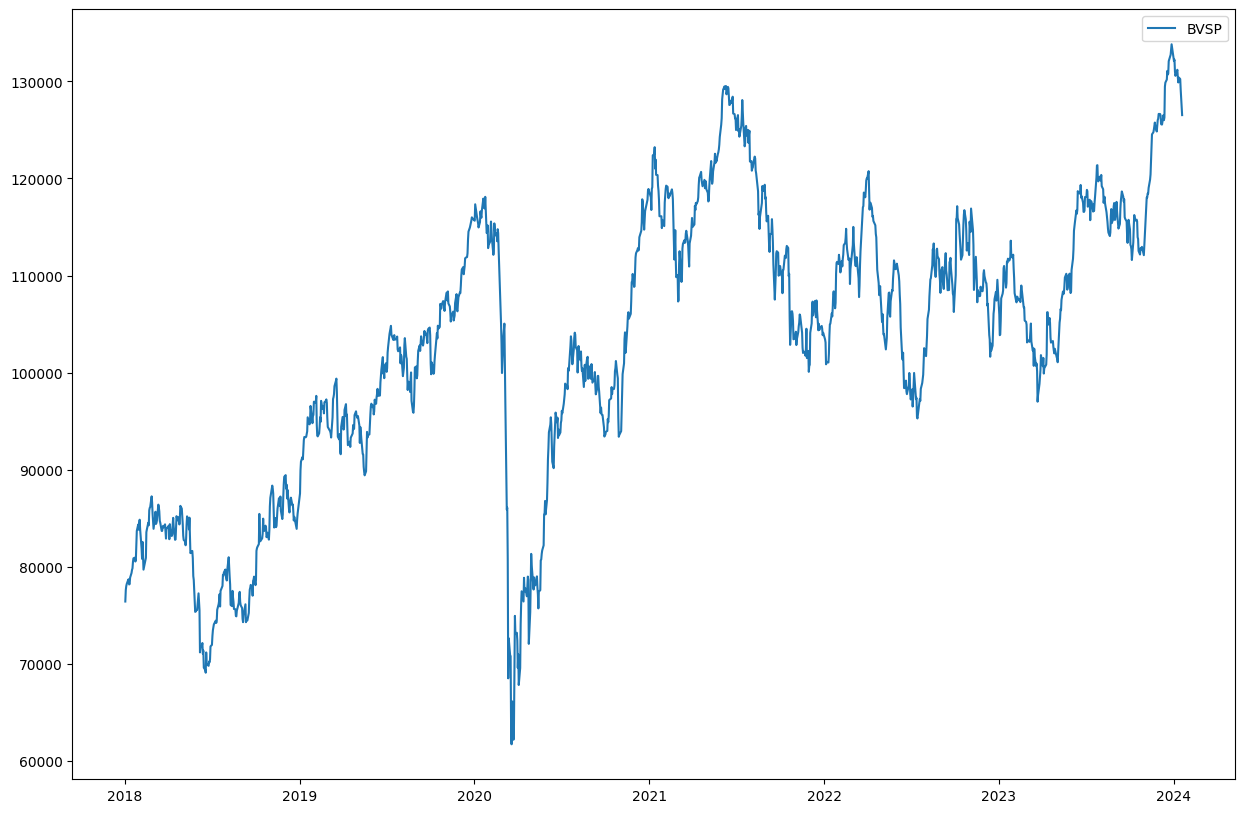

In [93]:
# Relação Date x Low (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Low'], label='BVSP')

plt.legend(loc='best')
plt.show()

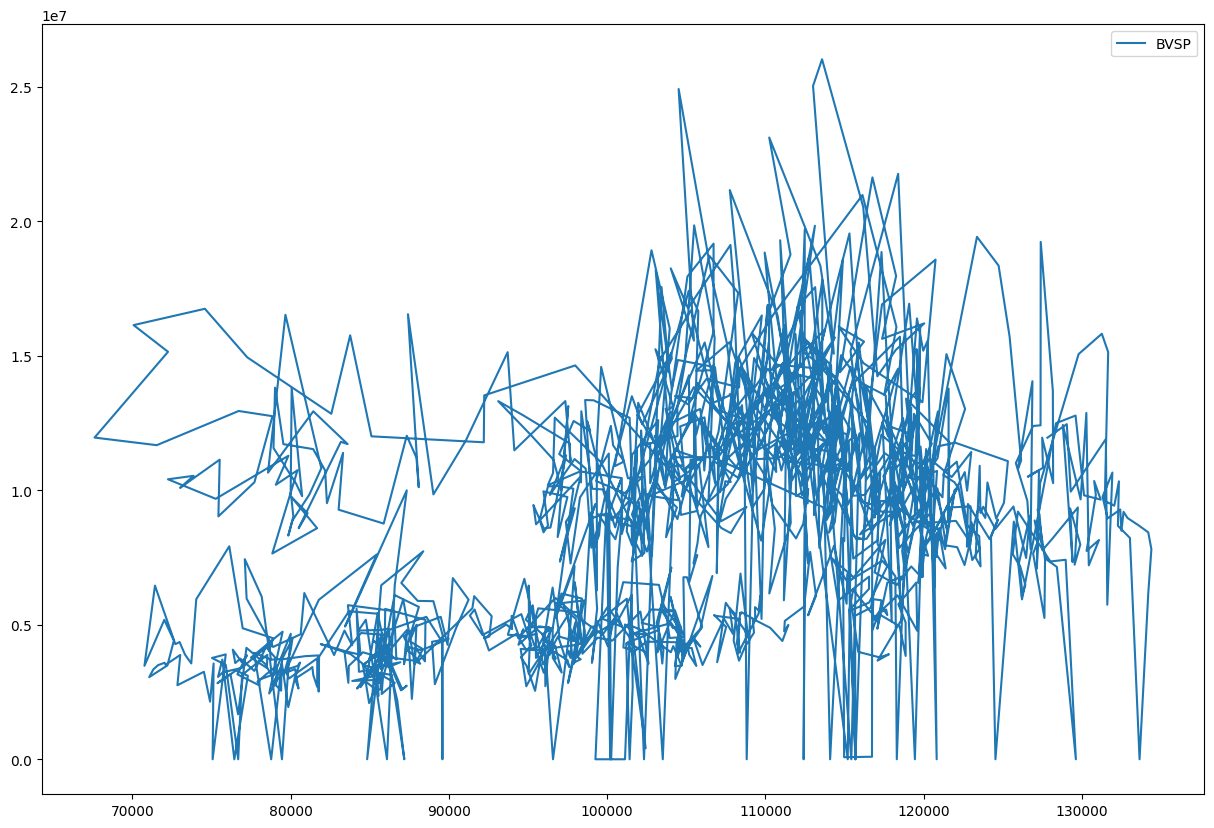

In [94]:
# Relação High x Volume (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['High'], df['Volume'], label='BVSP')

plt.legend(loc='best')
plt.show()


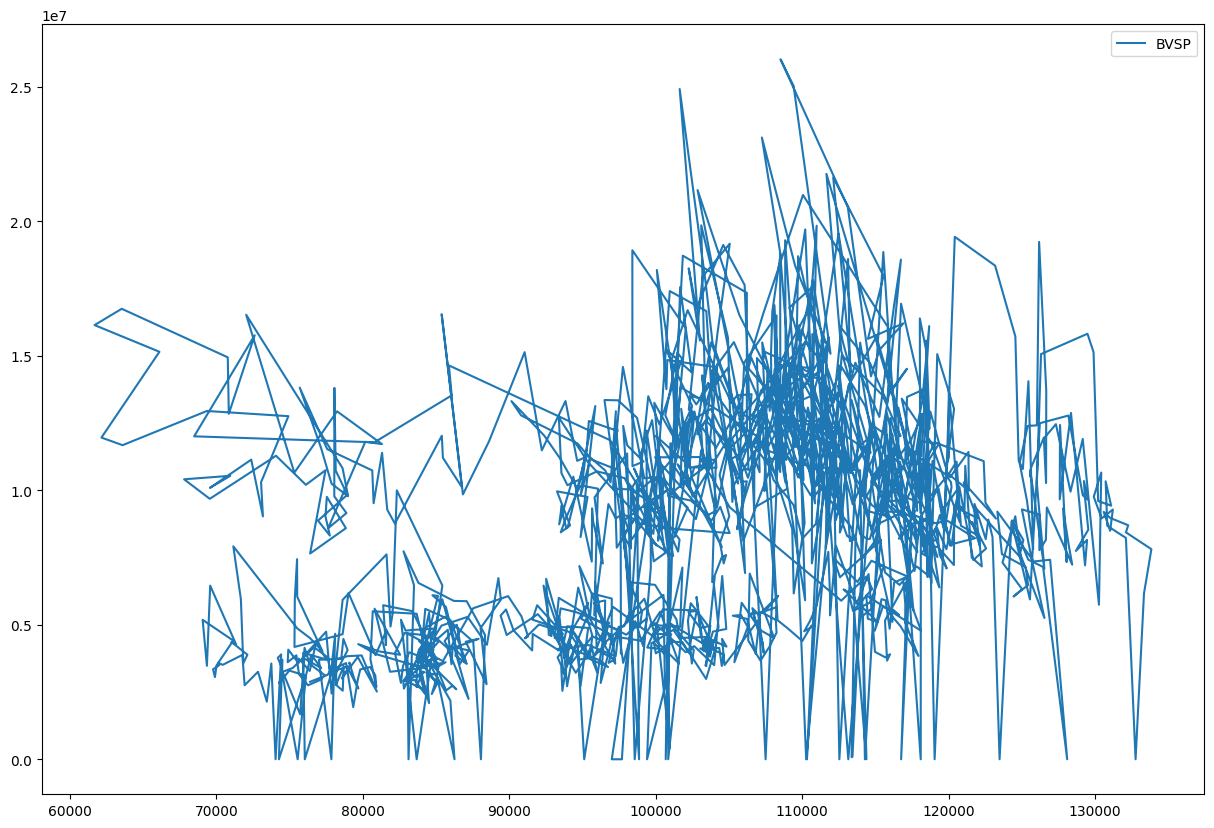

In [95]:
# Relação Low x Volume (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Low'], df['Volume'], label='BVSP')

plt.legend(loc='best')
plt.show()